## Second miniproject for MPUM course TCS@UJ

this project focuses on comparing Logistic Regression with Naive Bayesian Classifier algorithms on given data (rp.data file)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithms import *
from sklearn.model_selection import train_test_split
from functions import *
from sklearn import metrics

In [3]:
# Load the data
data = pd.read_csv('rp.data', sep=4*' ', header=None)

print(data.shape)

print("feature: min, max")
for i in range(data.shape[1]-1):
    print( i, data[i].min(), data[i].max())

idx = data.shape[1]-1
print("value: ", data[idx].min(), data[idx].max())

# change the value to 0 and 1
data[idx] = data[idx].apply(lambda x: 1 if x == 4 else 0)

(683, 10)
feature: min, max
0 1 10
1 1 10
2 1 10
3 1 10
4 1 10
5 1 10
6 1 10
7 1 10
8 1 10
value:  2 4


/var/folders/w4/xs9m4t1j28598sp65xft3k1h0000gn/T/ipykernel_16384/4083339205.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('rp.data', sep=4*' ', header=None)


9
0    444
1    239
Name: count, dtype: int64


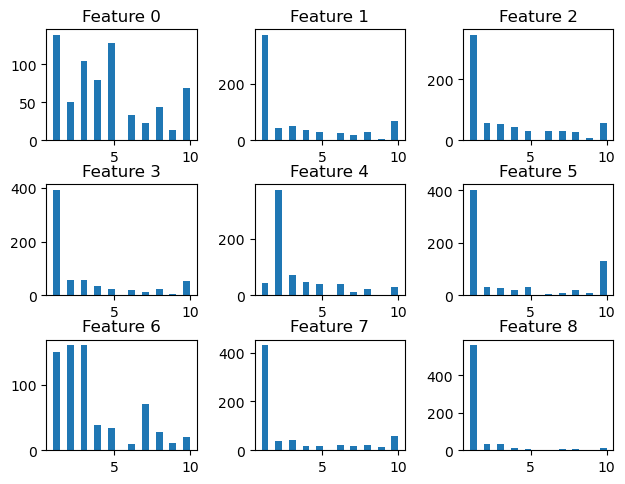

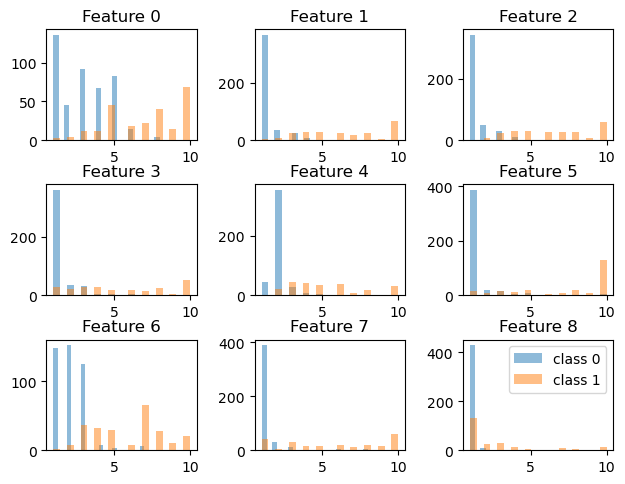

65.00732064421669
34.99267935578331


In [4]:
# basic data analysis

# count the number of each class
print(data[idx].value_counts())

# for each feature, plot the distribution of the values (as a 2x4 grid of histograms)
fig, axs = plt.subplots(3, 3)
plt.tight_layout()

for i in range(data.shape[1]-1):
    axs[i//3, i%3].hist(data[i], bins=20)
    axs[i//3, i%3].set_title('Feature ' + str(i))
plt.show()

data0 = data[data[idx] == 0]
data1 = data[data[idx] == 1]


# for each feature, plot the distribution of the values for each class (as a 2x4 grid of histograms)
fig, axs = plt.subplots(3, 3)
plt.tight_layout()

for i in range(data0.shape[1]-1):
    axs[i//3, i%3].hist(data0[i], bins=20, alpha=0.5, label='class 0')
    axs[i//3, i%3].hist(data1[i], bins=20, alpha=0.5, label='class 1')
    axs[i//3, i%3].set_title('Feature ' + str(i))
plt.legend()
plt.show()

print(len(data0)/len(data) * 100)
print(len(data1)/len(data)*100)

In [5]:
X_train, X_test, Y_train, Y_test = split_data(data) # this is how you can split the data


Logistic Regression
Train accuracy:  97.15536105032822 Train precision:  98.01324503311258 Train recall:  99.10714285714286
Test accuracy:  97.78761061946902 Test precision:  98.66071428571429 Test recall:  99.10313901345292


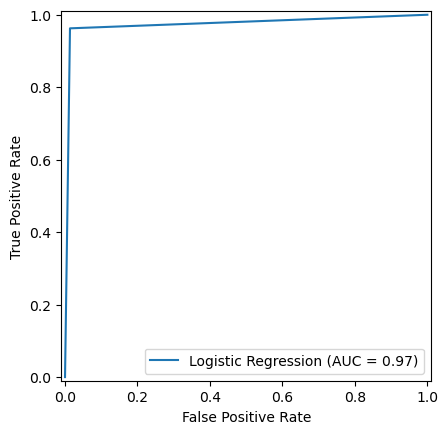

In [6]:
# testing Logistic Regression

model = LogisticRegression()

model.fit(X_train, Y_train)

Y_hat_train = model.predict(X_train)
Y_hat_test = model.predict(X_test)

accuracy_train, precision_train, recall_train = model.accuracy(Y_hat_train, Y_train)

accuracy_test, precision_test, recall_test = model.accuracy(Y_hat_test, Y_test)

print("Logistic Regression")
print("Train accuracy: ", accuracy_train, "Train precision: ", precision_train, "Train recall: ", recall_train)
print("Test accuracy: ", accuracy_test, "Test precision: ", precision_test, "Test recall: ", recall_test)

fpr, tpr, thresholds = metrics.roc_curve(Y_hat_test,Y_test)

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Regression')
display.plot()
plt.show()


Naive Bayes
Train accuracy:  97.59299781181619 Train precision:  94.61077844311377 Train recall:  98.75
Test accuracy:  97.34513274336283 Test precision:  95.06172839506173 Test recall:  97.46835443037975


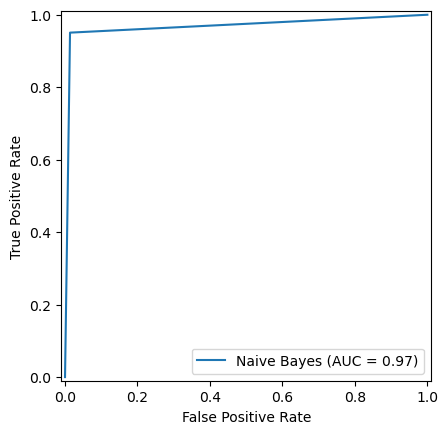

In [7]:
# testing Naive Bayes

model = NaiveBayes()

model.fit(X_train, Y_train)

Y_hat_train = model.predict(X_train)
Y_hat_test = model.predict(X_test)

accuracy_train, precision_train, recall_train = model.accuracy(Y_hat_train, Y_train)

accuracy_test, precision_test, recall_test = model.accuracy(Y_hat_test, Y_test)

print("Naive Bayes")
print("Train accuracy: ", accuracy_train, "Train precision: ", precision_train, "Train recall: ", recall_train)
print("Test accuracy: ", accuracy_test, "Test precision: ", precision_test, "Test recall: ", recall_test)

fpr, tpr, thresholds = metrics.roc_curve(Y_hat_test,Y_test)

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Naive Bayes')
display.plot()
plt.show()

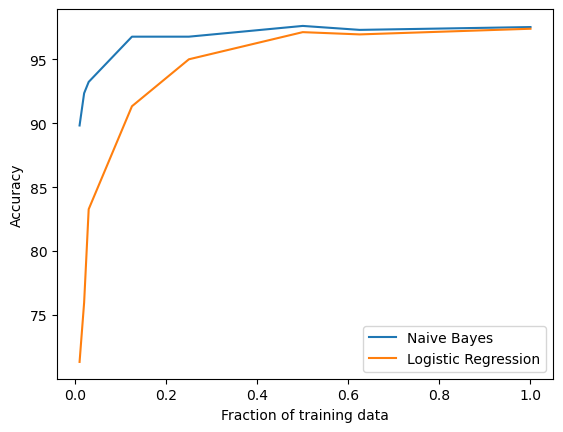

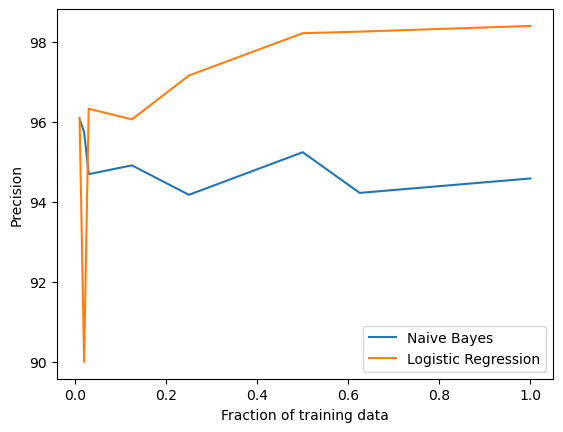

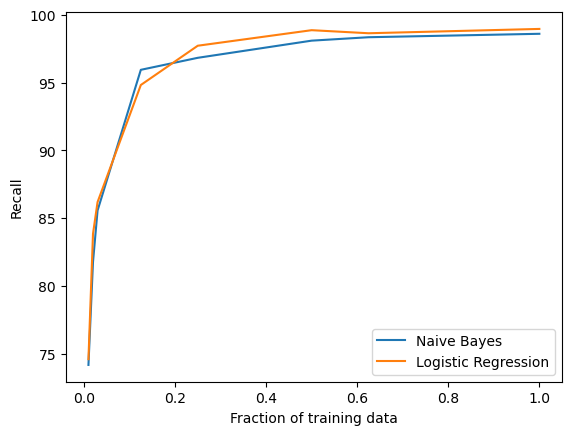

In [12]:
# training on different fractions of training data
# log_frac = np.log(data.shape[0]*2/3)/(data.shape[0]*2/3) # value for which generative model should be better
# print(log_frac)
fractions = [0.01, 0.02, 0.03, 0.125, 0.25, 0.5, 0.625, 1]
iter = 10

accuracy_history_NB = []
precision_history_NB = []
recall_history_NB = []

accuracy_history_LR = []
precision_history_LR = []
recall_history_LR = []

model_NB = NaiveBayes()
model_LR = LogisticRegression()

for fraction in fractions:
    accuracy, precision, recall = fraction_fitting(data, model_NB, fraction, iter)
    
    accuracy_history_NB.append(accuracy)
    precision_history_NB.append(precision)
    recall_history_NB.append(recall)
    
    accuracy, precision, recall = fraction_fitting(data, model_LR, fraction, iter)
    
    accuracy_history_LR.append(accuracy)
    precision_history_LR.append(precision)
    recall_history_LR.append(recall)

plt.plot(fractions, accuracy_history_NB, label='Naive Bayes')
plt.plot(fractions, accuracy_history_LR, label='Logistic Regression')
# plt.axvline(x=log_frac, color='r', linestyle='--') - it is so close to 0 that its hard to conclude anything
plt.xlabel('Fraction of training data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(fractions, precision_history_NB, label='Naive Bayes')
plt.plot(fractions, precision_history_LR, label='Logistic Regression')
plt.xlabel('Fraction of training data')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(fractions, recall_history_NB, label='Naive Bayes')
plt.plot(fractions, recall_history_LR, label='Logistic Regression')
plt.xlabel('Fraction of training data')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [9]:
# Final results on many iterations to achieve results with lower variance

iter = 100

accuracy_history_NB = []
precision_history_NB = []
recall_history_NB = []

accuracy_history_LR = []
precision_history_LR = []
recall_history_LR = []

model_NB = NaiveBayes()
model_LR = LogisticRegression()

for i in range(iter):
    X_train, X_test, Y_train, Y_test = split_data(data)
    
    model_NB.fit(X_train, Y_train)
    Y_hat_test = model_NB.predict(X_test)
    accuracy, precision, recall = model_NB.accuracy(Y_hat_test, Y_test)
    
    accuracy_history_NB.append(accuracy)
    precision_history_NB.append(precision)
    recall_history_NB.append(recall)
    
    model_LR.fit(X_train, Y_train)
    Y_hat_test = model_LR.predict(X_test)
    accuracy, precision, recall = model_LR.accuracy(Y_hat_test, Y_test)
    
    accuracy_history_LR.append(accuracy)
    precision_history_LR.append(precision)
    recall_history_LR.append(recall)
    
print("Naive Bayes")
print("Accuracy: ", np.mean(accuracy_history_NB), "Precision: ", np.mean(precision_history_NB), "Recall: ", np.mean(recall_history_NB))
print("Logistic Regression")
print("Accuracy: ", np.mean(accuracy_history_LR), "Precision: ", np.mean(precision_history_LR), "Recall: ", np.mean(recall_history_LR))



Naive Bayes
Accuracy:  97.61061946902653 Precision:  94.93540094631082 Recall:  98.45569620253164
Logistic Regression
Accuracy:  97.12389380530972 Precision:  98.15880974970354 Recall:  98.92859069399306


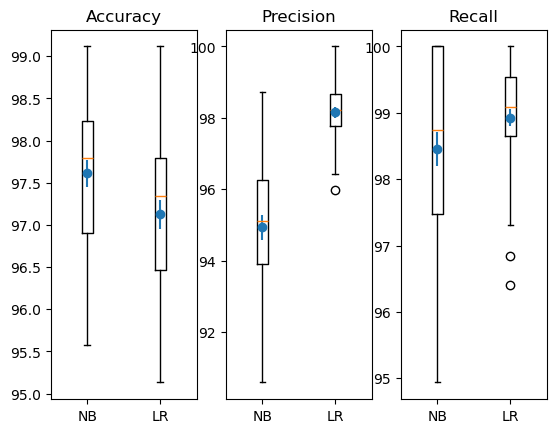

In [10]:
# plot results from previous block with variance bars and conf intervals (works also with results from fraction cell) (( results are wild though))
fig, axs = plt.subplots(1,3)

axs[0].boxplot([accuracy_history_NB, accuracy_history_LR], labels=['NB', 'LR'])
# add 95% confidence interval
axs[0].errorbar([1, 2], [np.mean(accuracy_history_NB), np.mean(accuracy_history_LR)], yerr=[1.96*np.std(accuracy_history_NB)/np.sqrt(iter), 1.96*np.std(accuracy_history_LR)/np.sqrt(iter)], fmt='o')
axs[0].set_title("Accuracy")
axs[1].boxplot([precision_history_NB, precision_history_LR], labels=['NB', 'LR'])
axs[1].errorbar([1, 2], [np.mean(precision_history_NB), np.mean(precision_history_LR)], yerr=[1.96*np.std(precision_history_NB)/np.sqrt(iter), 1.96*np.std(precision_history_LR)/np.sqrt(iter)], fmt='o')
axs[1].set_title("Precision")
axs[2].boxplot([recall_history_NB, recall_history_LR], labels=['NB', 'LR'])
axs[2].errorbar([1, 2], [np.mean(recall_history_NB), np.mean(recall_history_LR)], yerr=[1.96*np.std(recall_history_NB)/np.sqrt(iter), 1.96*np.std(recall_history_LR)/np.sqrt(iter)], fmt='o')
axs[2].set_title("Recall")
plt.show()

In [17]:
# benchmarking
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

iter = 100

accuracy_history_NB = []
precision_history_NB = []
recall_history_NB = []

accuracy_history_LR = []
precision_history_LR = []
recall_history_LR = []

for i in range(iter):
    X_train, X_test, Y_train, Y_test = split_data(data)
    
    model = GaussianNB()
    model.fit(X_train, Y_train)
    Y_hat_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_hat_test, Y_test)
    precision = metrics.precision_score(Y_hat_test, Y_test)
    recall = metrics.recall_score(Y_hat_test, Y_test)
    
    accuracy_history_NB.append(accuracy)
    precision_history_NB.append(precision)
    recall_history_NB.append(recall)
    
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_hat_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_hat_test, Y_test)
    precision = metrics.precision_score(Y_hat_test, Y_test)
    recall = metrics.recall_score(Y_hat_test, Y_test)
    
    accuracy_history_LR.append(accuracy)
    precision_history_LR.append(precision)
    recall_history_LR.append(recall)
    
print("Naive Bayes")
print("Accuracy: ", np.mean(accuracy_history_NB))
print("Precision: ", np.mean(precision_history_NB)) 
print("Recall: ", np.mean(recall_history_NB))
print("Logistic Regression")
print("Accuracy: ", np.mean(accuracy_history_LR))
print("Precision: ", np.mean(precision_history_LR)) 
print("Recall: ", np.mean(recall_history_LR))

Naive Bayes
Accuracy:  0.9611504424778761
Precision:  0.9805063291139241
Recall:  0.9155660451032313
Logistic Regression
Accuracy:  0.9665929203539824
Precision:  0.9496202531645568
Recall:  0.9551788818457951
